<div style="width:900px;background:#cff2f9;border:1px solid black;text-align:left;padding:8px;">


<p>
<span style="color:black;font-size:14pt"><b>Scrapping</span></b>
<br>
<br><b>Step 1:</b> 
<br><b>Step 2:</b> Identify fixed features that can predict price
<br><b>Step 3:</b> Impute NaN values to -99
<br><b>Step 4:</b> Standardise all numeric values
<p>
<span style="color:black;font-size:14pt"><b>Data Cleaning</span></b>
<br>
<br><b>Step 1:</b> Remove all Nan, duplicates, clean up salary 
<br><b>Step 2:</b> 

</p>
<p><br>
<span style="color:Black;font-size:14pt"><b>Feature Selection</span></b>
<br>
<br>Use Use LDA to get the words for features

</p>
<p><br>
<span style="color:Black;font-size:14pt"><b>Regression</span></b>
<br>
<br>Use Linear Regression



</div>

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pickle


sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
path = './projectsindeed_cleaned' ##to dots is go up one folder
df = pd.read_csv(path) # Importing CSV into Data Frame


In [3]:
df.shape

(4343, 11)

In [4]:
df.head()

,Unnamed: 0,company,country,description,location,review,star,title,min_salary,max_salary,mean_salary
0,10,UMeKang,Singapore,"Use all available data, undertaking data disco...",Singapore,NaN,NaN,Data Scientist,9000.0,11000.0,10000.0
1,3,Cresco Data Pte Ltd,Singapore,Data Scientist Duties:. We are looking for a D...,Tanjong Pagar,NaN,NaN,Data Scientist,3500.0,4500.0,4000.0
2,8,iKas International (Asia) Pte Ltd,Singapore,"Using data modeling, linear regression, statis...",Singapore,NaN,NaN,Data Scientist,7000.0,9000.0,8000.0
3,6,Vault Dragon,Singapore,Assist the Data Scientist in deploying Machine...,Singapore,NaN,NaN,Data Engineer,4000.0,6000.0,5000.0
4,5,TSA Solutions,Singapore,Data Scientist - Summary*. Bachelor in degree ...,Pasir Panjang,NaN,NaN,Data Scientist,4200.0,4200.0,4200.0


In [5]:
df.drop(['Unnamed: 0','review','star','min_salary','max_salary'], axis=1, inplace=True)

In [6]:
df.head()

,company,country,description,location,title,mean_salary
0,UMeKang,Singapore,"Use all available data, undertaking data disco...",Singapore,Data Scientist,10000.0
1,Cresco Data Pte Ltd,Singapore,Data Scientist Duties:. We are looking for a D...,Tanjong Pagar,Data Scientist,4000.0
2,iKas International (Asia) Pte Ltd,Singapore,"Using data modeling, linear regression, statis...",Singapore,Data Scientist,8000.0
3,Vault Dragon,Singapore,Assist the Data Scientist in deploying Machine...,Singapore,Data Engineer,5000.0
4,TSA Solutions,Singapore,Data Scientist - Summary*. Bachelor in degree ...,Pasir Panjang,Data Scientist,4200.0


In [7]:
df.shape

(4343, 6)

In [8]:
df.isnull().sum()

company          8
country          0
description      0
location         0
title            0
mean_salary    377
dtype: int64

In [9]:
df.company.fillna(value='Unknown', inplace=True)

In [10]:
df.mean_salary.mean()

4599.085844259549

In [11]:
df.mean_salary.fillna(value= df.mean_salary.mean(), inplace=True)

In [12]:
df.isnull().sum()

company        0
country        0
description    0
location       0
title          0
mean_salary    0
dtype: int64

In [13]:
#To check for other no 

colwmiss = []
missingval = []
for col in df.columns.tolist():
    if df[col].isnull().sum() > 0:
        colwmiss.append(col)
        missingval.append(df[col].isnull().sum())

zip(colwmiss,missingval)

[]

### Topic Modelling and LDA step

In [15]:
from gensim import corpora, models, matutils
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import defaultdict
import pandas as pd


#doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
#doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
#doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
#doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
#doc_e = "Health professionals say that brocolli is good for your health."

# compile sample documents into a list
#documents = [doc_a, doc_b, doc_c, doc_d, doc_e]
#df2        = pd.DataFrame(documents, columns=['text'])

In [16]:
from nltk.corpus import stopwords

nltk_stops = stopwords.words()

In [17]:
# Setting the vectorizer just like we would set a model
cvec = CountVectorizer()

# Fitting the vectorizer on our training data
cvec.fit(df['description'])

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [18]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

custom_stop_words = list(ENGLISH_STOP_WORDS)

# You can of course add your own custom stopwords
#custom_stop_words.append('mother')
#custom_stop_words.append('brother')

In [19]:
#3. Use CountVectorizer to transform our text, taking out the stopwords.
vectorizer = CountVectorizer(stop_words=custom_stop_words)
X = vectorizer.fit_transform(df['description'])


In [20]:
X

<4343x5564 sparse matrix of type '<type 'numpy.int64'>'
	with 56320 stored elements in Compressed Sparse Row format>

In [21]:
vectorizer.vocabulary_

{u'hchn': 2431,
 u'dynamic': 1763,
 u'nottingham': 3478,
 u'consists': 1258,
 u'cobit': 1068,
 u'looking': 3069,
 u'lucion': 3086,
 u'aud': 562,
 u'eligible': 1831,
 u'segments': 4574,
 u'disability': 1643,
 u'pensions': 3743,
 u'teaching': 5028,
 u'characterised': 955,
 u'hats': 2426,
 u'collate': 1088,
 u'updated': 5288,
 u'collaborate': 1082,
 u'rescue': 4339,
 u'downstream': 1724,
 u'void': 5413,
 u'regional': 4257,
 u'raising': 4153,
 u'updates': 5289,
 u'govern': 2355,
 u'advocating': 322,
 u'bringing': 773,
 u'vois': 5414,
 u'vast': 5351,
 u'internally': 2738,
 u'skills': 4681,
 u'companies': 1146,
 u'solution': 4710,
 u'coventry': 1366,
 u'enhance': 1886,
 u'markov': 3168,
 u'enrollment': 1895,
 u'uncovers': 5252,
 u'force': 2189,
 u'concise': 1208,
 u'workloadclinical': 5523,
 u'japanese': 2835,
 u'feasibility': 2118,
 u'second': 4554,
 u'subordinate': 4901,
 u'implemented': 2589,
 u'errors': 1942,
 u'preferences': 3918,
 u'mls': 3325,
 u'complexities': 1183,
 u'neg': 3420,
 u

In [22]:
vectorizer.get_feature_names()

[u'00',
 u'000',
 u'0000',
 u'00005d8x',
 u'00005kdy',
 u'00005m2k',
 u'00005m67',
 u'00005m6b',
 u'00005m8e',
 u'00005n9y',
 u'00005o6b',
 u'00011',
 u'000pa',
 u'00am',
 u'00pm',
 u'01224',
 u'01782',
 u'0191',
 u'028',
 u'03',
 u'10',
 u'100',
 u'100k',
 u'1052',
 u'10pm',
 u'11',
 u'110',
 u'110k',
 u'113',
 u'1133',
 u'118313br',
 u'12',
 u'1250',
 u'13',
 u'14',
 u'1438',
 u'15',
 u'150',
 u'1500',
 u'152',
 u'16',
 u'160250',
 u'160320',
 u'169',
 u'17',
 u'170081',
 u'18',
 u'180',
 u'181518',
 u'1832',
 u'18k',
 u'19',
 u'1913',
 u'1974',
 u'1998',
 u'1x',
 u'20',
 u'200',
 u'20000',
 u'2005',
 u'2008',
 u'20089',
 u'2010',
 u'2012',
 u'2013',
 u'2014',
 u'2015',
 u'2016',
 u'2017',
 u'20170927',
 u'2018',
 u'204',
 u'21',
 u'2108',
 u'212',
 u'22',
 u'220',
 u'22k',
 u'23',
 u'24',
 u'25',
 u'250',
 u'250pd',
 u'2520',
 u'256',
 u'25k',
 u'27',
 u'27001',
 u'273743',
 u'28',
 u'288',
 u'28k',
 u'29',
 u'2nd',
 u'2x',
 u'30',
 u'300',
 u'300pd',
 u'30k',
 u'31',
 u'3157',
 u'3

In [23]:
#Get count of tokens
docs = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names())
docs_top30 = docs.sum().sort_values(ascending = False).head(30)

In [24]:
docs_top30.head(50)

data           5864
analyst        2345
business        837
experience      798
scientist       651
analysis        617
team            521
read            484
looking         407
working         404
role            370
senior          355
work            352
support         337
join            332
sql             330
management      326
research        319
scientists      316
client          298
based           282
analysts        272
skills          270
analytics       262
reporting       257
information     252
systems         252
financial       235
ability         229
large           208
dtype: int64

In [25]:
vocab = {v: k for k, v in vectorizer.vocabulary_.iteritems()}
vocab

{0: u'00',
 1: u'000',
 2: u'0000',
 3: u'00005d8x',
 4: u'00005kdy',
 5: u'00005m2k',
 6: u'00005m67',
 7: u'00005m6b',
 8: u'00005m8e',
 9: u'00005n9y',
 10: u'00005o6b',
 11: u'00011',
 12: u'000pa',
 13: u'00am',
 14: u'00pm',
 15: u'01224',
 16: u'01782',
 17: u'0191',
 18: u'028',
 19: u'03',
 20: u'10',
 21: u'100',
 22: u'100k',
 23: u'1052',
 24: u'10pm',
 25: u'11',
 26: u'110',
 27: u'110k',
 28: u'113',
 29: u'1133',
 30: u'118313br',
 31: u'12',
 32: u'1250',
 33: u'13',
 34: u'14',
 35: u'1438',
 36: u'15',
 37: u'150',
 38: u'1500',
 39: u'152',
 40: u'16',
 41: u'160250',
 42: u'160320',
 43: u'169',
 44: u'17',
 45: u'170081',
 46: u'18',
 47: u'180',
 48: u'181518',
 49: u'1832',
 50: u'18k',
 51: u'19',
 52: u'1913',
 53: u'1974',
 54: u'1998',
 55: u'1x',
 56: u'20',
 57: u'200',
 58: u'20000',
 59: u'2005',
 60: u'2008',
 61: u'20089',
 62: u'2010',
 63: u'2012',
 64: u'2013',
 65: u'2014',
 66: u'2015',
 67: u'2016',
 68: u'2017',
 69: u'20170927',
 70: u'2018',
 

In [26]:
frequency = defaultdict(int)

for description in df.description:
    for token in description.split():
        frequency[token] += 1
        
frequency

defaultdict(int,
            {'\xc2\xa325,169': 1,
             'v04.docx.': 1,
             'four': 3,
             'EFFICIENCY': 1,
             'Does': 3,
             'compliance': 8,
             '(BCBA).': 1,
             'Foundation': 2,
             'to/follow...': 1,
             'RequirementsBachelor': 1,
             'eligible': 3,
             'SPT': 1,
             'extrapolate': 2,
             'systems,...': 1,
             'arms....': 2,
             'Western': 1,
             'Analytics,...': 1,
             'founding': 1,
             'collate': 6,
             'SQLS': 1,
             'Marketer....': 1,
             'required\xe2\x80\xa2': 1,
             'writing;': 2,
             'SciNet': 1,
             'advice,': 1,
             'Marlow....': 1,
             'bringing': 8,
             'writing.': 2,
             'internally': 4,
             'Reconcile': 1,
             'OVERVIEW.': 2,
             'Competencies': 1,
             '*Candidates': 1,
             

In [27]:
#remove words that appear once or stop words

texts = [[token for token in description.split() if frequency[token] > 1 and token not in nltk_stops]
          for description in df.description]

texts

/Users/kelvinang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  after removing the cwd from sys.path.


[['Use',
  'available',
  'data,',
  'undertaking',
  'data',
  'discovery',
  'identify',
  'opportunities,',
  'develop',
  'strategies',
  'techniques',
  'improve',
  'results....'],
 ['Data',
  'Scientist',
  'We',
  'looking',
  'Data',
  'Scientist',
  'help',
  'us',
  'analyse',
  'vast',
  'amounts',
  'data',
  'help',
  'us',
  'make',
  'smarter',
  'decisions',
  'deliver',
  'better...'],
 ['Using',
  'data',
  'modeling,',
  'linear',
  'regression,',
  'statistical',
  'methods',
  'proprietary',
  'data,',
  'role',
  'discover',
  'trends,',
  'data,',
  'provide...'],
 ['Assist',
  'Data',
  'Scientist',
  'deploying',
  'Machine',
  'Learning',
  'models.',
  'Manage',
  'data',
  'collection',
  'includes',
  'overseeing',
  'deployment',
  'technology'],
 ['Data',
  'Scientist',
  '-',
  'Bachelor',
  'degree',
  'data',
  'Analyze',
  'internal',
  'data',
  'identify',
  'business',
  'opportunities',
  'working',
  'stakeholders....'],
 ['We',
  'looking',
  '

In [28]:
# Create gensim dictionary object
dictionary = corpora.Dictionary(texts)
dictionary

In [29]:
# Create corpus matrix
corpus = [dictionary.doc2bow(text) for text in texts]
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1)],
 [(11, 1),
  (13, 1),
  (14, 2),
  (15, 2),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 2),
  (21, 1),
  (22, 2),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1)],
 [(1, 2),
  (11, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1)],
 [(11, 1),
  (15, 1),
  (22, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1)],
 [(7, 1),
  (11, 2),
  (15, 1),
  (22, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1)],
 [(13, 1),
  (14, 1),
  (15, 1),
  (17, 1),
  (18, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (25, 1),
  (58, 1),
  (59, 1),
  (60, 1)],
 [(11, 2),
  (39, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69

In [30]:
type(corpus)

list

In [31]:
len(corpus)

4343

In [32]:
lda = models.LdaModel(matutils.Sparse2Corpus(X, documents_columns=False), num_topics  =  3, passes = 20,
                      id2word =  dictionary)
    # supply our sparse predictor matrix wrapped in a matutils.Sparse2Corpus object
#    matutils.Sparse2Corpus(X, documents_columns=False),
    # or alternatively use the corpus object created with the dictionary in the previous frame!
    # corpus,
    # The number of topics we want:
#    num_topics  =  3,
    # how many passes over the vocabulary:
#    passes      =  20,
    # The id2word vocabulary we made ourselves
#    id2word     =  vocab
    # or use the gensim dictionary object!
    # id2word     =  dictionary

In [33]:
#The model has a .print_topics function that accepts the number of topics to print and number of words per topic. 
#The number before the word is the probability of occurance for that word in the topic.
lda.print_topics(num_topics=3, num_words=5)

[(0,
  u'0.070*"Well" + 0.043*"Google" + 0.040*"manipulation," + 0.014*"Edinburgh***." + 0.014*"Analyst..."'),
 (1,
  u'0.026*"IS21_Information" + 0.022*"mine," + 0.009*"interpret," + 0.009*"$" + 0.008*"ranging"'),
 (2,
  u'0.142*"Google" + 0.018*"Well" + 0.016*"Analyst)...." + 0.015*"database" + 0.013*"interpret,"')]

In [34]:
#The .get_document_topics function accepts a bag-of-words representation for a document and 
#returns the scores for each topic.

lda.get_document_topics(dictionary.doc2bow(texts[2]))

[(0, 0.091526892186463135),
 (1, 0.88430023829503224),
 (2, 0.024172869518504649)]

In [35]:
topics_labels = {
   0: "LDA Lable 1",
   1: "LDA Lable 2",
   2: "LDA Lable 3",
#   3: "LDA Lable 4",
#   4: "LDA Lable 5",
}

In [37]:
doc = []
doc_topics = [lda.get_document_topics(doc) for doc in corpus]

topic_data = []

for document_id, topics in enumerate(doc_topics):
    
    document_topics = []
    
    for topic, probability in topics:
       
        topic_data.append({
            'document_id':  document_id,
            'topic_id':     topic,
            'topic':        topics_labels[topic],
            'probability':  probability
        })

topics_df = pd.DataFrame(topic_data)
topics_df.pivot_table(values="probability", index=["document_id", "topic"]).T

document_id        0                                   1                 \
topic       LDA Lable 1 LDA Lable 2 LDA Lable 3 LDA Lable 1 LDA Lable 2   
probability    0.714064    0.257875    0.028061     0.13993    0.842242   

document_id                    2                                   3     \
topic       LDA Lable 3 LDA Lable 1 LDA Lable 2 LDA Lable 3 LDA Lable 1   
probability    0.017828    0.091527    0.884294    0.024178    0.116477   

document_id     ...            4339        4340                          \
topic           ...     LDA Lable 3 LDA Lable 1 LDA Lable 2 LDA Lable 3   
probability     ...        0.177521    0.181368     0.52085    0.297782   

document_id        4341                                4342              \
topic       LDA Lable 1 LDA Lable 2 LDA Lable 3 LDA Lable 1 LDA Lable 2   
probability    0.298248    0.580321    0.121432    0.200084    0.604515   

document_id              
topic       LDA Lable 3  
probability    0.195401  

[1 rows x 13029 columns]

In [38]:
%matplotlib inline

In [39]:
import seaborn as sns

doc_topics = [lda.get_document_topics(doc) for doc in corpus]

doc_topic_probabilities = []

for document in doc_topics:
    
    single_document = []
    
    for topic, probablity in document:
        
        single_document.append(probablity)
        
    doc_topic_probabilities.append(single_document)
    
docs_topics = pd.DataFrame(doc_topic_probabilities)




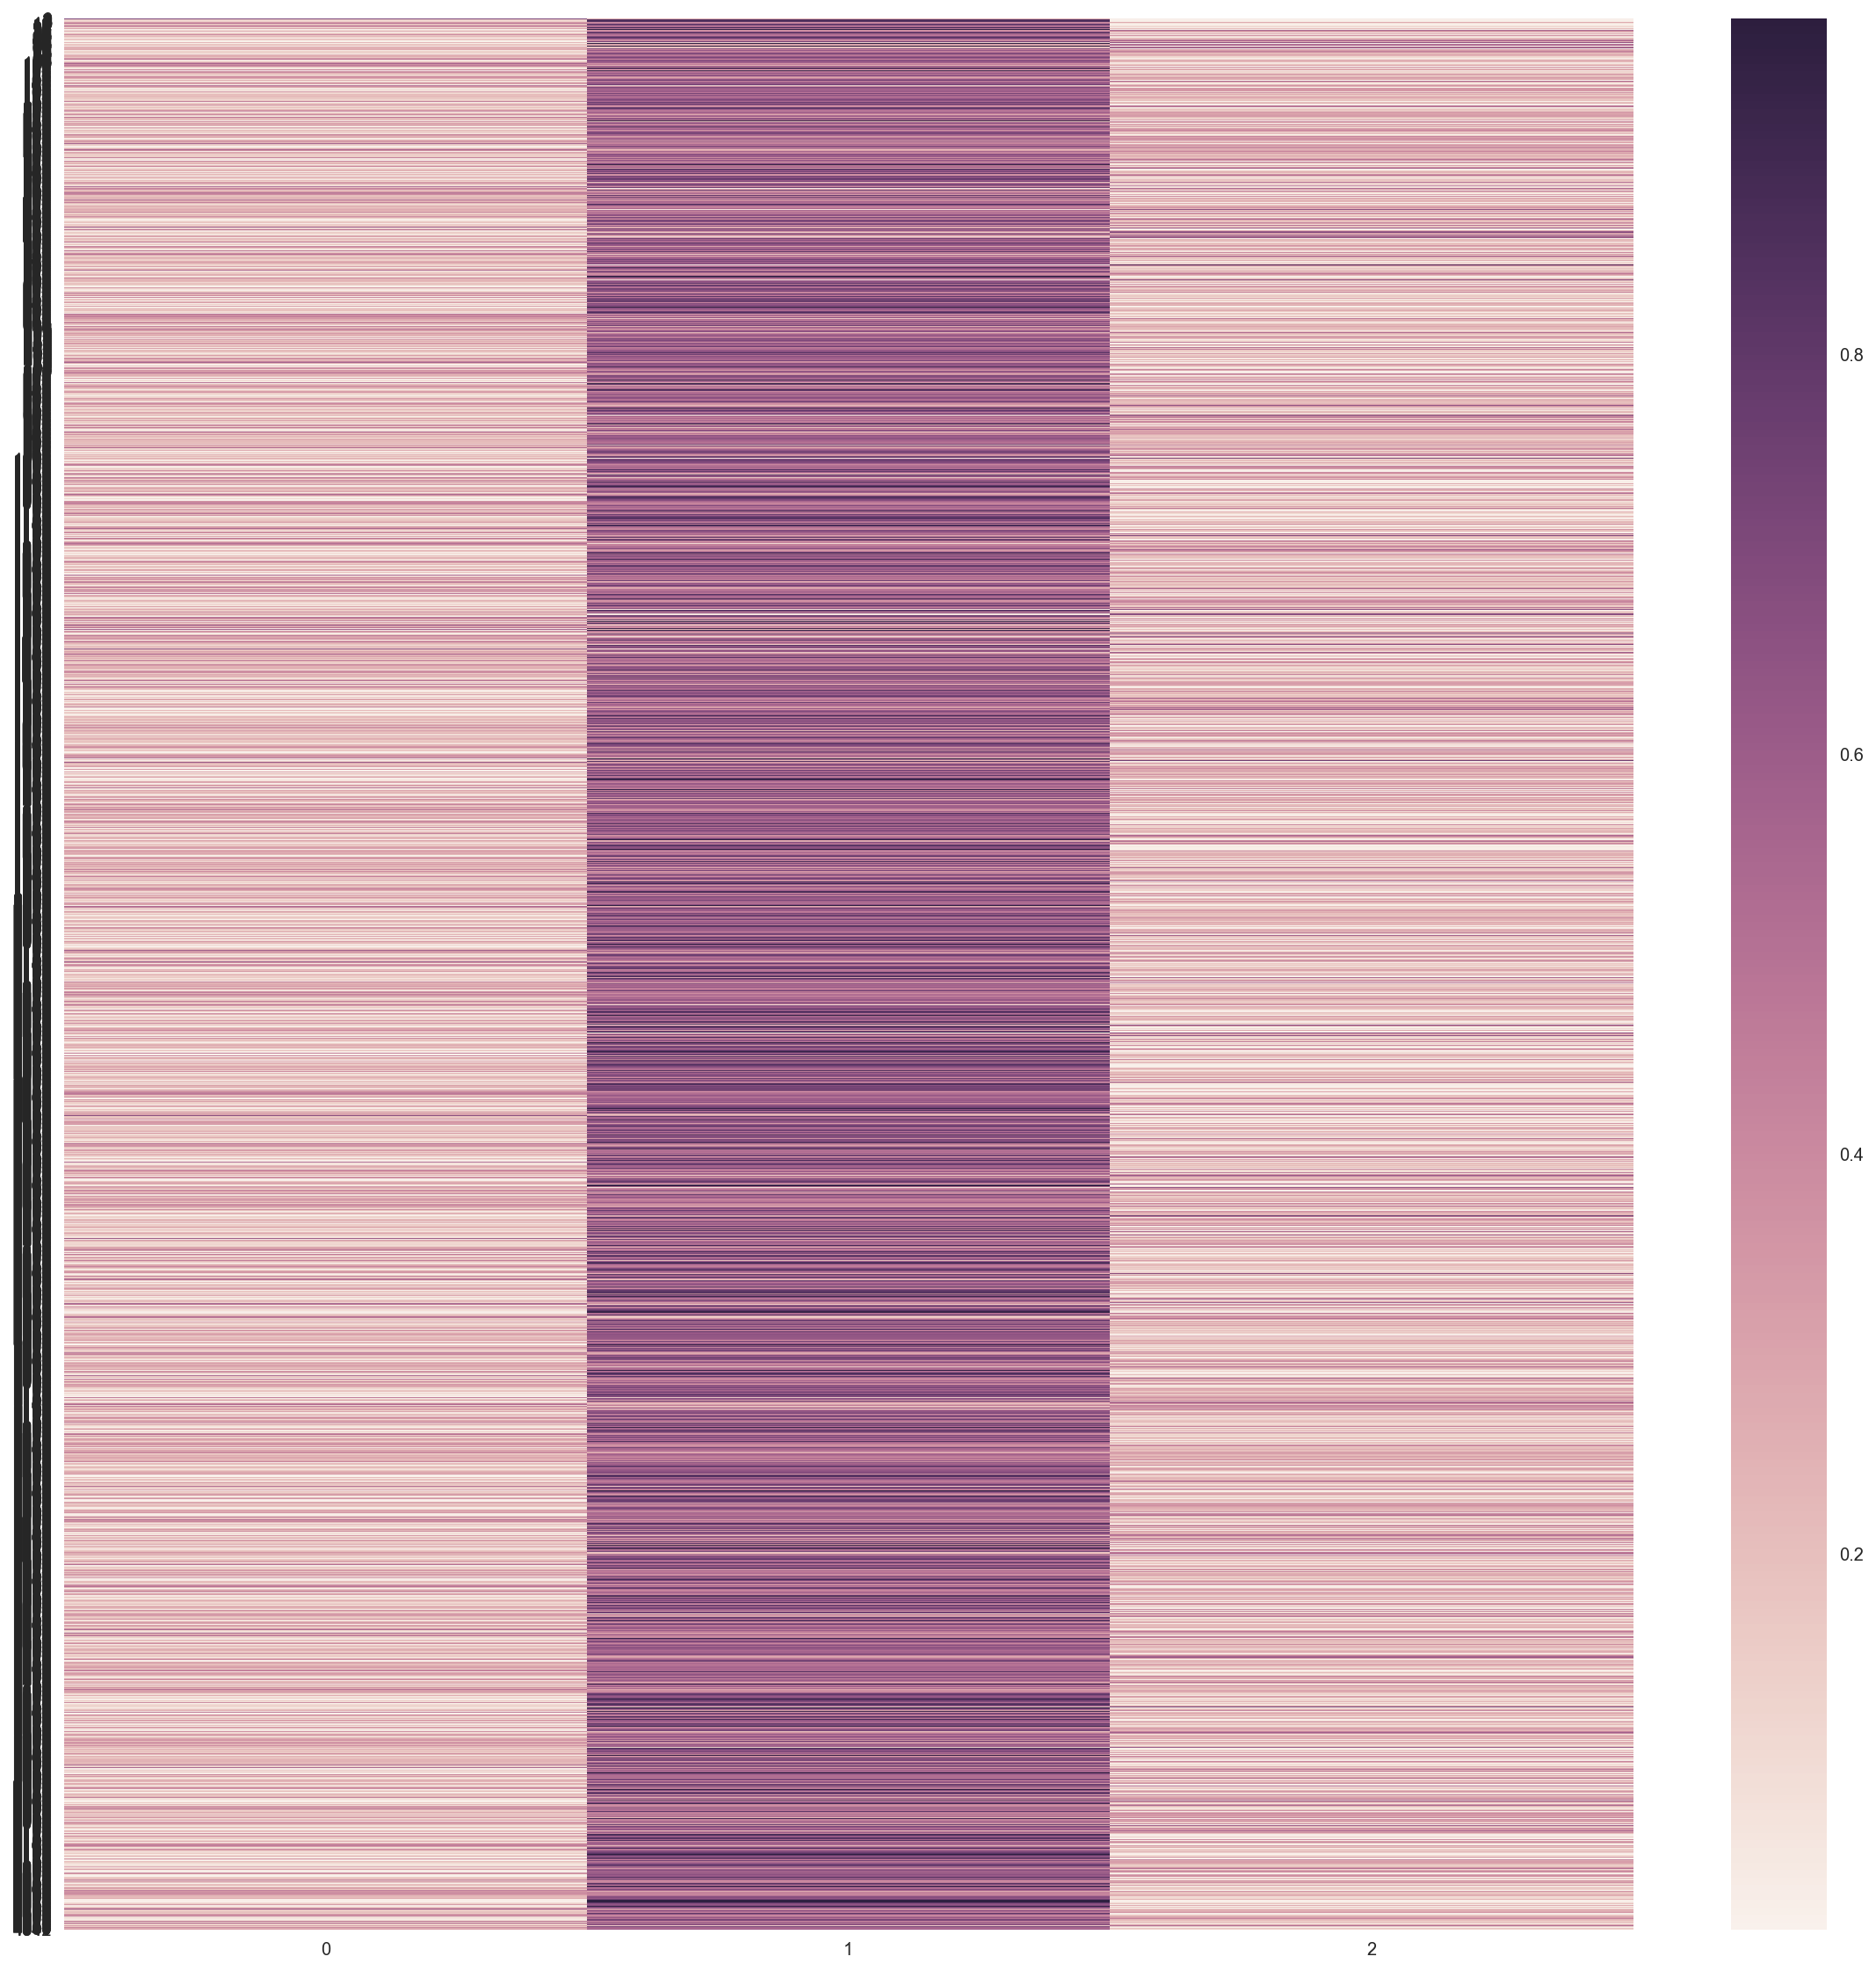

In [40]:
fix, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(docs_topics)

In [41]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_topics=3)
lda.fit(X)

/Users/kelvinang/anaconda/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_jobs=1, n_topics=3, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [42]:
lda.components_

array([[  3.56914339,   0.34923611,   2.1159602 , ...,   0.52393643,
          0.34663478,   0.33348988],
       [  0.33388633,  58.48015202,   0.95791246, ...,   1.34168724,
          3.70948218,   0.33351442],
       [  0.44441653,  15.3777354 ,   0.37750979, ...,   0.34687133,
          0.33357988,   1.56542025]])

In [43]:
#Use the .transform() method to convert the matrix into the topic scores
lda.transform(X)

array([[ 0.02776347,  0.02299831,  0.94923822],
       [ 0.4228337 ,  0.12859665,  0.44856964],
       [ 0.95636575,  0.02144068,  0.02219358],
       ..., 
       [ 0.74110615,  0.07569819,  0.18319565],
       [ 0.48721428,  0.49014572,  0.02264001],
       [ 0.74428093,  0.07671927,  0.1789998 ]])